Data from the 2014 American National Youth Tobacco Survey

**Objective:** Create an analysis report and predictive model on the smoking habits of American Youth.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

smokeData = pd.read_csv('smokeData.csv')
smokeCol = smokeData.columns.values.tolist()
len(smokeCol)

163

In [2]:
len(smokeData)

22007

There are a total of 163 variables and 22 thousand instances in this dataset. There is no way we're going to use all of these variables to model our data so we should first manually go through all the variables and learn what they actually represent. Along with the data provided by the CDC is the Codebook for the dataset which tells you exactly what each variable represents and the proportion of reponses to each variable.

Right off the bat we can see that our data is very specific, for example it separates the act of smoking into several different variables based on the exact method of smoking. These include: cigarettes, cigars, cigarillos, chewing tabacco, snuff etc. While most variables seem to be somewhat related to our topic of interest, many of them are not that useful and just create clutter as a result. For example, while variables such as if the respondent thinks it's cool to smoke directly affects whether they have smoked before or not, we usually wouldn't know the feelings and thoughts of the individual we're trying to predict.

So instead we'll be analyzing and using the most basic, concrete, and easy to obtain variables for an individual to build our model, namely: Age, Sex, Grade, Race, and RuralUrban (whether the individual lives in a urban or rural area).

In [3]:
df = smokeData[['Age','Sex','Grade','Race','RuralUrban','ever_cigarettes','ever_cigars_cigarillos_or',
                'Ever_chewing_tobacco_snuf']].copy()
df.head()

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
0,13.0,M,2.0,hispanic,Urban,False,False,False
1,12.0,F,2.0,hispanic,Urban,False,False,False
2,14.0,M,2.0,native,Urban,False,False,False
3,13.0,M,2.0,hispanic,Urban,False,False,False
4,14.0,M,2.0,native,Urban,True,False,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22007 entries, 0 to 22006
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        21850 non-null  float64
 1   Sex                        21795 non-null  object 
 2   Grade                      21836 non-null  float64
 3   Race                       20800 non-null  object 
 4   RuralUrban                 22007 non-null  object 
 5   ever_cigarettes            21565 non-null  object 
 6   ever_cigars_cigarillos_or  21492 non-null  object 
 7   Ever_chewing_tobacco_snuf  21528 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.3+ MB


In [5]:
df.describe(include = 'all')

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
count,21850.000000,21795,21836.000000,20800,22007,21565,21492,21528
unique,NaN,2,NaN,6,2,2,2,2
top,NaN,M,NaN,white,Urban,False,False,False
freq,NaN,11150,NaN,9893,11811,16709,17696,19812
mean,14.499588,NaN,3.828586,NaN,NaN,NaN,NaN,NaN
std,2.087983,NaN,1.991755,NaN,NaN,NaN,NaN,NaN
min,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


The first thing we check for in every dataset is missing values and it looks like we have missing values in every column except for RuralUrban. There are many ways of dealing with missing values; taking the response variable 'ever_cigarettes' for example, it is a binary variable that represents whether the individual has ever smoked cigarettes or not. Because it is a binary variable, there are really only 2 ways we can deal with it. Either fill them in with values or remove all of them. The first option is okay, but I think the second option is the best because we have 22 thousand rows in total and we're only missing 500 rows which isn't a lot by comparison; we won't be losing that much information.

In [6]:
df.dropna(subset=['ever_cigarettes'], inplace = True)
df.describe(include = 'all')

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
count,21478.000000,21426,21465.000000,20493,21565,21565,21194,21213
unique,NaN,2,NaN,6,2,2,2,2
top,NaN,M,NaN,white,Urban,False,False,False
freq,NaN,10921,NaN,9819,11571,16709,17506,19549
mean,14.503539,NaN,3.833636,NaN,NaN,NaN,NaN,NaN
std,2.084909,NaN,1.991209,NaN,NaN,NaN,NaN,NaN
min,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


Doing the same for Sex.

In [7]:
df.dropna(subset=['Sex'], inplace = True)
df.describe(include = 'all')

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
count,21393.000000,21426,21401.000000,20416,21426,21426,21065,21086
unique,NaN,2,NaN,6,2,2,2,2
top,NaN,M,NaN,white,Urban,False,False,False
freq,NaN,10921,NaN,9796,11468,16606,17404,19435
mean,14.503389,NaN,3.833185,NaN,NaN,NaN,NaN,NaN
std,2.084643,NaN,1.990427,NaN,NaN,NaN,NaN,NaN
min,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


Now we could do the same thing for Race, except we would be removing over 1000 data points and that would lead to quite a lot of data loss. Instead of removing the missing values, we can try some different methods of filling them in. Since Race is a categorical variable, we can fill them in using different strategies such as mode or a specific pattern(using sklearn Imputer or pandas interpolate or fillna), or one-hot encode the variable and then set 'everything' to 0 (where appropraite and makes sense), or we can even train a classifier using the other variables to predict the missing values if we had the time.

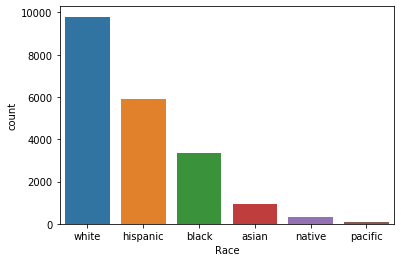

In [8]:
sns.countplot(x = 'Race', data = df, order = df['Race'].value_counts().index)

In [9]:
# Bar graph using pandas and matplotlib instead of seaborn
# import matplotlib.pyplot as plt

# df['Race'].value_counts().plot(kind="bar")

# plt.show()

We'll be filling the missing values using the mode and see how it does down the line.

In [10]:
df.fillna(value = {'Race':'White'}, inplace = True)
df.describe(include = 'all')

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
count,21393.000000,21426,21401.000000,21426,21426,21426,21065,21086
unique,NaN,2,NaN,7,2,2,2,2
top,NaN,M,NaN,white,Urban,False,False,False
freq,NaN,10921,NaN,9796,11468,16606,17404,19435
mean,14.503389,NaN,3.833185,NaN,NaN,NaN,NaN,NaN
std,2.084643,NaN,1.990427,NaN,NaN,NaN,NaN,NaN
min,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


With numerical variables such as Age or Grade, we have a bit more options of how to fill in the missing values. Some typical strategies of filling include using: the mean, the mode, the median, (min + max)/2 etc. We'll be using the median for both Age and Grade as it produces slightly more consistent results than the mean (we won't have someone who is Grade 4.5 for example).

In [11]:
df.fillna(value = {'Age': 14, 'Grade': 4}, inplace = True)
df.describe(include = 'all')

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
count,21426.000000,21426,21426.000000,21426,21426,21426,21065,21086
unique,NaN,2,NaN,7,2,2,2,2
top,NaN,M,NaN,white,Urban,False,False,False
freq,NaN,10921,NaN,9796,11468,16606,17404,19435
mean,14.502614,NaN,3.833380,NaN,NaN,NaN,NaN,NaN
std,2.083131,NaN,1.989273,NaN,NaN,NaN,NaN,NaN
min,9.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,13.000000,NaN,2.000000,NaN,NaN,NaN,NaN,NaN
50%,14.000000,NaN,4.000000,NaN,NaN,NaN,NaN,NaN
75%,16.000000,NaN,6.000000,NaN,NaN,NaN,NaN,NaN


Now that we're done with dealing with the missing values, we can move on to some preliminary analysis and sanity checks.

We see that:
* We have a good split of male and female respondents as well as Rural and Urban living respondents.

* The top responding race demographic was whites at about 45.7%.

* Roughly 77.5% of the surveyed population have never smoked a cigarette; it's good news that the majority of our younger generation doesn't smoke.

* The youngest respondents are 9 years of age and grade 1 respectively, in fact a quarter of our respondents are around 13 years of age and in grade 2.

#### Let's take a closer look at the last point.

13.0    3528
14.0    3194
12.0    3010
15.0    2879
16.0    2852
17.0    2797
18.0    1647
11.0    1305
19.0     173
9.0       31
10.0      10
Name: Age, dtype: int64

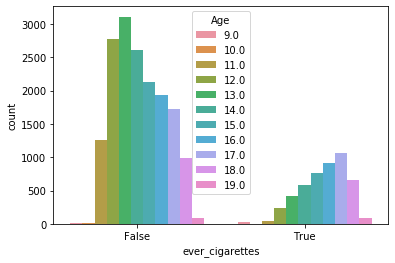

In [12]:
sns.countplot(x="ever_cigarettes", hue="Age", data=df)
df['Age'].value_counts()

In [13]:
len(df[(df['Age'] < 12) & (df['ever_cigarettes'] == True)])

75

We notice that the trend is within expectations as there is a positive relationship between the number of people who have tried cigarettes and the age of the individuals. We also see a huge difference in the number of people who are 11 and under vs 12 and over and who have smoked cigarettes before. This prompts us to consider those who have smoked cigarettes and are 11 and under to be outliers in our dataset. Because it is a pretty safe assumption that most people under the age of 12 have not smoked cigarettes before, we can remove those individuals from our dataset.

In [14]:
# drop all respondents under age of 12 who have smoked before
df = df.drop(df[(df['Age'] < 12) & (df['ever_cigarettes'] == True)].index)
# need to reset index or some rows will just be missing and it'll create errors down the line
df.reset_index(drop = True, inplace = True)
# Altnerative method
# df = df[(df.Age < 12) & (df.ever_cigarettes == True)]

3.0    3457
2.0    3435
1.0    3232
5.0    2887
4.0    2851
6.0    2774
7.0    2705
8.0      10
Name: Grade, dtype: int64

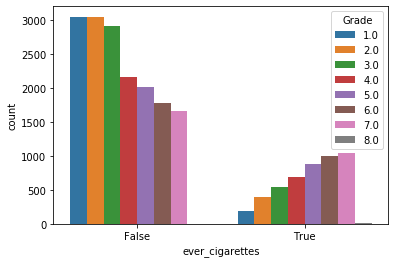

In [15]:
sns.countplot(x="ever_cigarettes", hue="Grade", data=df)
df['Grade'].value_counts()

Our Age and Grade graphs look pretty good now.

We also notice a capital letters problem with our Race variable resulting in an extra category, so let's fix it.

In [16]:
df.Race.unique()

array(['hispanic', 'native', 'White', 'black', 'white', 'asian',
       'pacific'], dtype=object)

In [17]:
# replace White with white so it's consistent
df = df.replace('White', 'white')

In [18]:
# Need to turn predictor variables from a dataframe into numpy array before we can use OneHotEncoder
X = df[['Sex', 'Race', 'RuralUrban']].to_numpy()

# Altnative Method
# X = df.loc[:, ['Age', 'Sex', 'Race']]

In [19]:
from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder()
X = pd.DataFrame(onehot.fit_transform(X).toarray(), columns = onehot.get_feature_names())

Since Age and Grade are highly correlated (it's easy to tell without doing any statistical tests), we should only use 1 of them in our model to avoid the multicolinearity problem. We're going to use Age over Grade because we've already removed some outliers based on Age and it is the more basic variable as everyone has an Age, but it is possible that they do not have a Grade (if they're not in school for whatever reason).

In [20]:
X.insert(0, 'Age', df[['Age']], True)
X

,Age,x0_F,x0_M,x1_asian,x1_black,x1_hispanic,x1_native,x1_pacific,x1_white,x2_Rural,x2_Urban
0,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,14.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,13.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,14.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
21346,17.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
21347,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
21348,19.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21349,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Quick check to make sure we correctly encoded the predictor categorical variables. 

In [21]:
# df.head()
df.tail()

,Age,Sex,Grade,Race,RuralUrban,ever_cigarettes,ever_cigars_cigarillos_or,Ever_chewing_tobacco_snuf
21346,17.0,M,7.0,hispanic,Rural,True,True,False
21347,16.0,F,5.0,white,Rural,False,False,False
21348,19.0,M,8.0,black,Rural,True,True,False
21349,18.0,F,7.0,white,Rural,False,True,False
21350,18.0,F,7.0,black,Rural,True,False,False


In [22]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = df[['ever_cigarettes']].to_numpy()
y = le.fit_transform(y.ravel())
# 0 - False, 1 - True
y

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [23]:
X = X.to_numpy()
print(X.shape)
print(y.shape)

(21351, 11)
(21351,)


### Building the Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

log_clf = LogisticRegression()

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

gridsearch = GridSearchCV(log_clf, param_grid, n_jobs = -1)

gridsearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
gridsearch.best_score_

0.7775761124121778

In [26]:
best_est = gridsearch.best_estimator_
best_est.score(X_test,y_test)

0.7780379302271131

In [27]:
best_est.coef_

array([[ 0.34518676, -0.0581947 ,  0.05814976, -0.0688631 , -0.02141137,
         0.05101119,  0.01181007,  0.00468759,  0.02272068,  0.1146945 ,
        -0.11473944]])

In [28]:
best_est.intercept_

array([-6.41124723])

#### Our resulting Logistic Model is the following:

$$logit(p_i) = -6.48 + 0.35*Age - 0.05*SexFemale + 0.05*SexMale - 0.07*RaceAsian - 0.03*RaceBlack + 0.07*RaceHispanic + 0.02*RaceNative + 0.006RacePacific + 0.01*RaceWhite + 0.11*Rural - 0.11*Urban$$

where $p_i$ is the probability that the i-th respondent has ever smoked cigarettes.

This model is able to reach 77.7% accuracy on the test set.

From the model, it seems that the most important variable in determining the probability that a respondents smokes or not is their age; the older they are, the more likely they are to have smoked a cigarette before. We also notice that females are less likely to smoke than males, people who live in Urban areas are less likely to smoke than  those who live in Rural areas, and among the 6 races in our data, whites are the most likely to smoke and asians are the least likely. We do have to keep in mind that the the distribution of Race was heavily skewed for whites as almost 50% of respondents were whites, because of this, we should take the last result with a grain of salt.

### Trying out other models: Decision Tree, Random Forest and ANN.

Let's see if we can achieve better results using some other models.

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dec_tree = DecisionTreeClassifier()

param_grid = {'max_depth': [100, 300, 500, 800, 1000, 1500, 2000]}

gridsearch = GridSearchCV(dec_tree, param_grid, n_jobs = -1)

gridsearch.fit(X_train, y_train)

gridsearch.best_score_

0.7765807962529273

In [30]:
gridsearch.best_params_

{'max_depth': 100}

In [31]:
rnd_forest = RandomForestClassifier()

param_grid = {'n_estimators': [100, 300, 500, 800, 1000], 'max_depth': [100, 200, 300]}

gridsearch = GridSearchCV(rnd_forest, param_grid, n_jobs = -1)

gridsearch.fit(X_train, y_train)

gridsearch.best_score_

0.7768149882903981

In [32]:
gridsearch.best_params_

{'max_depth': 300, 'n_estimators': 500}

In [52]:
import tensorflow as tf
from tensorflow import keras

# Split training data into training and validation set
X_train_part, X_valid, y_train_part, y_valid = train_test_split(X_train, y_train, test_size = 0.2)

simple_nn = keras.models.Sequential()

simple_nn.add(keras.layers.Dense(100, activation = 'relu', input_shape = (11,)))
simple_nn.add(keras.layers.Dense(100, activation = 'relu'))
simple_nn.add(keras.layers.Dense(1, activation = 'sigmoid'))

In [53]:
simple_nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               1200      
_________________________________________________________________
dense_17 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 101       
Total params: 11,401
Trainable params: 11,401
Non-trainable params: 0
_________________________________________________________________


In [54]:
# Already tried learning rate of 0.01 and 0.001 to the same effect.
optimizer = keras.optimizers.SGD(lr = 0.0003)
simple_nn.compile(loss="binary_crossentropy", optimizer = optimizer, metrics = ['accuracy'])

# callbacks for early stopping and model checkpoint

# stops training after 20 epochs of no validation loss improvement
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)

# Saves the model and its weights with the best validation loss
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("simple_nn.h5", save_best_only=True)

callbacks = [early_stopping_cb, model_checkpoint_cb]

In [55]:
simple_nn.fit(X_train_part, y_train_part, epochs = 100, validation_data = (X_valid, y_valid), callbacks = callbacks)

Train on 13664 samples, validate on 3416 samples
Epoch 1/100
13664/13664 [==============================] - 1s 62us/sample - loss: 0.5834 - accuracy: 0.7404 - val_loss: 0.5410 - val_accuracy: 0.7878
Epoch 2/100
13664/13664 [==============================] - 1s 46us/sample - loss: 0.5550 - accuracy: 0.7749 - val_loss: 0.5397 - val_accuracy: 0.7878
Epoch 3/100
13664/13664 [==============================] - 1s 45us/sample - loss: 0.5541 - accuracy: 0.7749 - val_loss: 0.5381 - val_accuracy: 0.7878
Epoch 4/100
13664/13664 [==============================] - 1s 46us/sample - loss: 0.5531 - accuracy: 0.7749 - val_loss: 0.5374 - val_accuracy: 0.7878
Epoch 5/100
13664/13664 [==============================] - 1s 46us/sample - loss: 0.5526 - accuracy: 0.7749 - val_loss: 0.5367 - val_accuracy: 0.7878
Epoch 6/100
13664/13664 [==============================] - 1s 45us/sample - loss: 0.5520 - accuracy: 0.7749 - val_loss: 0.5368 - val_accuracy: 0.7878
Epoch 7/100
13664/13664 [==========================

Epoch 55/100
13664/13664 [==============================] - 1s 49us/sample - loss: 0.5343 - accuracy: 0.7749 - val_loss: 0.5201 - val_accuracy: 0.7878
Epoch 56/100
13664/13664 [==============================] - 1s 46us/sample - loss: 0.5341 - accuracy: 0.7749 - val_loss: 0.5203 - val_accuracy: 0.7878
Epoch 57/100
13664/13664 [==============================] - 1s 47us/sample - loss: 0.5338 - accuracy: 0.7749 - val_loss: 0.5197 - val_accuracy: 0.7878
Epoch 58/100
13664/13664 [==============================] - 1s 47us/sample - loss: 0.5335 - accuracy: 0.7749 - val_loss: 0.5202 - val_accuracy: 0.7878
Epoch 59/100
13664/13664 [==============================] - 1s 48us/sample - loss: 0.5331 - accuracy: 0.7749 - val_loss: 0.5195 - val_accuracy: 0.7878
Epoch 60/100
13664/13664 [==============================] - 1s 48us/sample - loss: 0.5328 - accuracy: 0.7749 - val_loss: 0.5185 - val_accuracy: 0.7878
Epoch 61/100
13664/13664 [==============================] - 1s 45us/sample - loss: 0.5324 - ac

All 3 of the extra models that we've tried yielded very similar results as our logistic regression model, an accuracy of about 77%. It seems that in this case, using more advanced models did not give us better results. I suspect that this is due to the limits of our training data, afterall we are technically only using 3 predictor variables. If we wanted to get a higher accuracy, I would suggest going back to look at things such as the distribution of the Race variable, adding in addition variables, or perhaps using Grades instead of Age as a predictor variable.